# Offshore Wind Structure - Exercise 1
The objective of this exercise is the computation of the power curve and energy generation for a wind turbine over a period of time. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
The rated power of an average household is assumed to be approximately 4.4 kW. At that location, there is a ‘constant’ wind speed of 5 m/s. What shall be the minimum diameter of a wind turbine able to satisfy the power requirements?

In [10]:
ro = 1.225 # kg/m3
u  = 5     # m/s
P  = 4400  # W
cp = 0.6   # -

A = 2*P/(ro*u**3*cp)
r = np.sqrt(A/3.14)

print('The minimal diameter is', 2*r, 'm')

The minimal diameter is 11.046071032498103 m


## Question 2 - Selection of wind turbine
Gather the main characteristics: rated power, cut-in / cut-out wind speed and swept area. The chosen wind turbine for this exercise is Vestas V162- 5.6 MW.

In [11]:
cut_in = 3    # m/s
cut_out = 25  # m/s

A = 20612     # m2
c_p = 0.44

P_rated = 5600000 # W

## Question 3
Calculate the rated wind speed assuming a power coefficient of 0.44. 

In [12]:
cp = 0.44
rated_speed = ((2*P_rated)/(cp*ro*A))**(1/3)
print('The rated speed is, in m/s,',rated_speed)

The rated speed is, in m/s, 10.026969823003403


## Question 4 - Site Selection
water depth, wind \& wave statistics. Let us assume that the wind distribution relates to a Weibull distribution with shape factor equal to 2 (Rayleigh distribution). 

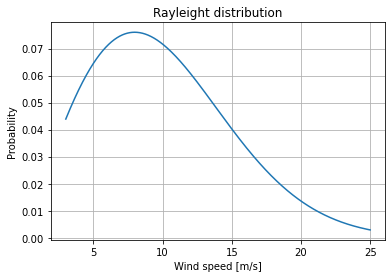

In [14]:
from scipy.stats import weibull_min
from scipy.special import gamma

u_mean = 10 # m/s

h = 2   # for Reyleigh distribution

q = u_mean/(gamma(1+1/h))

x = np.linspace(cut_in, cut_out, num=1000)
pdf_wind =  weibull_min.pdf(c=2, x=x, scale=q)

plt.title('Rayleight distribution')
plt.plot(x, pdf_wind)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Probability')
plt.grid()

## Question 5
Computation of the average power. Indicate the method employed to solve the integral. 

In [15]:
from scipy.integrate import simps

P_max = P_rated
P_min = 0.5*ro*20612*cut_in**3*cp

# POWER IN THE REGION I
P0 = 0

region_1 = (x < rated_speed) & (x > cut_in) 
region_2 = (x < cut_out) & (x > rated_speed) 

# Power in the rerion 1
f_1 = 0.5*cp*ro*A*x[region_1]**3

# POWER IN THE REGION Ii
P1 = simps(
    x=x[region_1], 
    y=pdf_wind[region_1]*f_1)

# POWER IN THE REGION III
P2 = simps(x=x[region_2], y=pdf_wind[region_2])*P_max

# POWER IN THE REGION IV
P3 = 0

P_avg = (P0+P1+P2+P3)/1e6
print('The average power, in MWatts, is', P_avg)
print('Using Simpsons')

The average power, in MWatts, is 3.508953944905553
Using Simpsons


## Question 6
Estimation of the electricity generated over one year. Plot the energy for different mean wind speeds and compare it with the leaflet provided by Vestas. How many households can be supplied by the wind turbine? The power losses due to transport are ignored. 

In [18]:
consumption_house = 4.0 # MWh
E_year = P_avg*24*365

print('Energy generated by year , in GWh,:', E_year/1e3)
print('Houses supplied:', int(E_year/consumption_house))

Energy generated by year , in GWh,: 30.738436557372644
Houses supplied: 7684


## Question 7 
Estimation of the capacity factor. Plot the capacity factor for different mean wind speeds. 

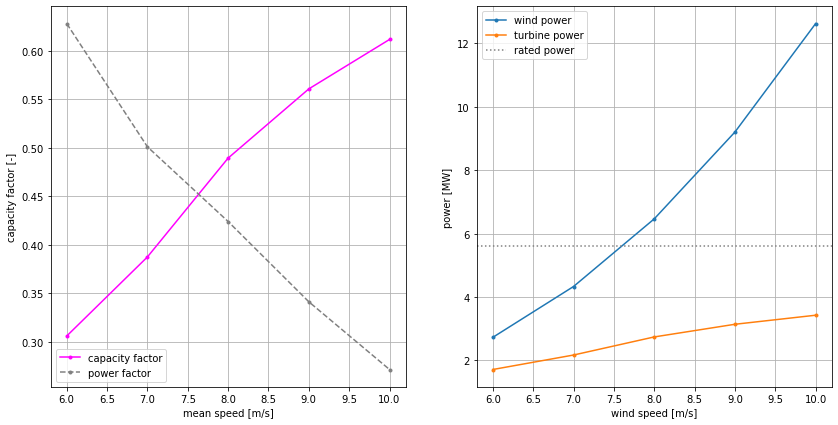

In [57]:
# annnual energy pof production (from Vestas brochure)
E_annual = np.array([15.0, 19.0, 24.0, 27.5, 30.0])*1e3 # [MWh]

wind_speeds = np.array([6.0 , 7.0 , 8.0 , 9.0 , 10.0])
P_tur = E_annual/(365*24) # turbine power [MW]
P_w = 0.5*ro*A*wind_speeds**3.0*1e-6 # wind power    [MW]

E_g = E_annual*1e6   # [Wh]
E_r = P_rated*365*24 # [Wh]

power_factor = P_tur/P_w
capacity_factor = E_g/E_r

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axes[0].plot(wind_speeds, capacity_factor, marker= '.', label='capacity factor', color='magenta')
axes[0].plot(wind_speeds, power_factor, marker= '.', label='power factor', color='gray', ls='--')
axes[0].set_xlabel('mean speed [m/s]')
axes[0].set_ylabel('capacity factor [-]')
axes[0].legend()
axes[0].grid()

axes[1].plot(wind_speeds, P_w,   marker= '.', label='wind power')
axes[1].plot(wind_speeds, P_tur, marker= '.', label='turbine power')
axes[1].axhline(P_rated*1e-6, ls=':', color='gray', label='rated power')
axes[1].set_xlabel('wind speed [m/s]')
axes[1].set_ylabel('power [MW]')
axes[1].legend()
axes[1].grid()

plt.show()
